<a href="https://colab.research.google.com/github/CommunityRADvocate/ida3-fall24-colabs/blob/main/Week_10_Solutions_Introduction_to_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 10 Activities - Welcome to Pandas!

This week our activities will focus on how you can use Pandas in your project to continue analyzing your data and generate even more insights. We will also demonstrate some ways you could use Pandas with Matplotlib to create visualizations.

In [ ]:
# This block set up the notebook by importing libraries and last cohort's project data. Make sure you run it before trying to run other blocks of code!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# extension for interactive tables -- limited to 20 columns
# %load_ext google.colab.data_table

# add link to dataset
url = 'https://raw.githubusercontent.com/CommunityRADvocate/ida2404-capstone/main/mxmh_survey_results.csv'
# read dataset and set it as a dataframe using pandas
df = pd.read_csv(url)

# see an overview of the imported dataframe, including column headers and their indexes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

## Cleaning and summarizing our data

Let's get a look at some of our data. Use the [head method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html) to look at the first 5 rows

In [ ]:
# Use the head function to get a look at the first 5 rows of our data set
df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


We know from our previous work with this data that we have some missing values. Use the [count method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.count.html) to identify how many rows have missing information

In [ ]:
# Use count to see the number of values in each column
df.count()

Timestamp                       736
Age                             735
Primary streaming service       735
Hours per day                   736
While working                   733
Instrumentalist                 732
Composer                        735
Fav genre                       736
Exploratory                     736
Foreign languages               732
BPM                             629
Frequency [Classical]           736
Frequency [Country]             736
Frequency [EDM]                 736
Frequency [Folk]                736
Frequency [Gospel]              736
Frequency [Hip hop]             736
Frequency [Jazz]                736
Frequency [K pop]               736
Frequency [Latin]               736
Frequency [Lofi]                736
Frequency [Metal]               736
Frequency [Pop]                 736
Frequency [R&B]                 736
Frequency [Rap]                 736
Frequency [Rock]                736
Frequency [Video game music]    736
Anxiety                     

Let's remove any rows that have missing data. Use the [dropna method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html) to remove those rows, then use count again to make sure we removed them. Remember to use the inplace argument to update the original dataset instead of creating a view

In [ ]:
# Use dropna to remove rows with missing data
df.dropna(inplace=True)

# Check that we have no missing values using count
df.count()

Timestamp                       616
Age                             616
Primary streaming service       616
Hours per day                   616
While working                   616
Instrumentalist                 616
Composer                        616
Fav genre                       616
Exploratory                     616
Foreign languages               616
BPM                             616
Frequency [Classical]           616
Frequency [Country]             616
Frequency [EDM]                 616
Frequency [Folk]                616
Frequency [Gospel]              616
Frequency [Hip hop]             616
Frequency [Jazz]                616
Frequency [K pop]               616
Frequency [Latin]               616
Frequency [Lofi]                616
Frequency [Metal]               616
Frequency [Pop]                 616
Frequency [R&B]                 616
Frequency [Rap]                 616
Frequency [Rock]                616
Frequency [Video game music]    616
Anxiety                     

Let's generate some basic statistics for our data. Try using the [describe method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) and see what you get!

In [ ]:
# Use the describe method with our dataframe
df.describe()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,616.000000,616.000000,6.160000e+02,616.000000,616.000000,616.000000,616.000000
mean,24.792208,3.702435,1.623500e+06,5.883929,4.894481,3.801136,2.659091
std,11.658515,3.071961,4.029114e+07,2.758269,2.998005,3.111972,2.857285
min,10.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,1.000000e+02,4.000000,2.000000,1.000000,0.000000
50%,21.000000,3.000000,1.200000e+02,6.000000,5.000000,3.000000,2.000000
75%,27.000000,5.000000,1.440000e+02,8.000000,7.000000,6.000000,5.000000
max,89.000000,24.000000,1.000000e+09,10.000000,10.000000,10.000000,10.000000


## Using Pandas to slice data

We can slice data in Pandas several different ways. We can access it by property, by label with loc, and by index with iloc.

In [ ]:
# Use brackets to get the Fav genre column
df['Fav genre']

2      Video game music
3                  Jazz
4                   R&B
5                  Jazz
6      Video game music
             ...       
731                Rock
732                 Pop
733                 Rap
734           Classical
735             Hip hop
Name: Fav genre, Length: 616, dtype: object

In [ ]:
# Use iloc to get the data in row # 525
df.iloc[525]

Timestamp                       9/12/2022 18:10:24
Age                                           22.0
Primary streaming service                  Spotify
Hours per day                                  2.0
While working                                   No
Instrumentalist                                 No
Composer                                        No
Fav genre                                     Rock
Exploratory                                     No
Foreign languages                               No
BPM                                          119.0
Frequency [Classical]                       Rarely
Frequency [Country]                          Never
Frequency [EDM]                              Never
Frequency [Folk]                             Never
Frequency [Gospel]                           Never
Frequency [Hip hop]                         Rarely
Frequency [Jazz]                            Rarely
Frequency [K pop]                           Rarely
Frequency [Latin]              

Let's add a new column to the dataframe. Let's create a column that adds up the values in Anxiety, Depression, Insomnia, and OCD and call it "Total Mental Health"

In [ ]:
# Create a new column on the dataframe
df['Total Mental Health'] = df['Anxiety'] + df['Depression'] + df['Insomnia'] + df['OCD']

# Use the head method to check that our new column was successfully created
df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions,Total Mental Health
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.,26.0
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.,22.0
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.,23.0
5,8/27/2022 21:56:50,18.0,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,...,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve,I understand.,30.0
6,8/27/2022 22:00:29,18.0,YouTube Music,3.0,Yes,Yes,No,Video game music,Yes,Yes,...,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve,I understand.,18.0


Our Timestamp column is being pulled in as an object. Let's convert it to datetime using [to_datetime](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html), then check that it updated successfully using [dtypes](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html)

In [ ]:
# update the timestamp column
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Use the dtypes method to check that it updated
df.dtypes

Timestamp                       datetime64[ns]
Age                                    float64
Primary streaming service               object
Hours per day                          float64
While working                           object
Instrumentalist                         object
Composer                                object
Fav genre                               object
Exploratory                             object
Foreign languages                       object
BPM                                    float64
Frequency [Classical]                   object
Frequency [Country]                     object
Frequency [EDM]                         object
Frequency [Folk]                        object
Frequency [Gospel]                      object
Frequency [Hip hop]                     object
Frequency [Jazz]                        object
Frequency [K pop]                       object
Frequency [Latin]                       object
Frequency [Lofi]                        object
Frequency [Me

## Using Pandas to analyze data


Let's start anlayzing our data by getting some grouped information. Let's start by using [groupby](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) to group responses by streaming service and store the grouped dataframe in a variable called streaming_grouped

In [ ]:
# use groupby to group by the Primary streaming service column
streaming_grouped = df.groupby('Primary streaming service')

Now, we can analyze the data by the streaming service the responders use. Here is an example of getting the count of responses by group

In [ ]:
# count the responses by streaming service
count_by_streaming = streaming_grouped['Timestamp'].count()
count_by_streaming

Primary streaming service
Apple Music                           42
I do not use a streaming service.     56
Other streaming service               40
Pandora                                9
Spotify                              396
YouTube Music                         73
Name: Timestamp, dtype: int64

Now, we can make a bar graph of these counts by Primary Streaming Service.

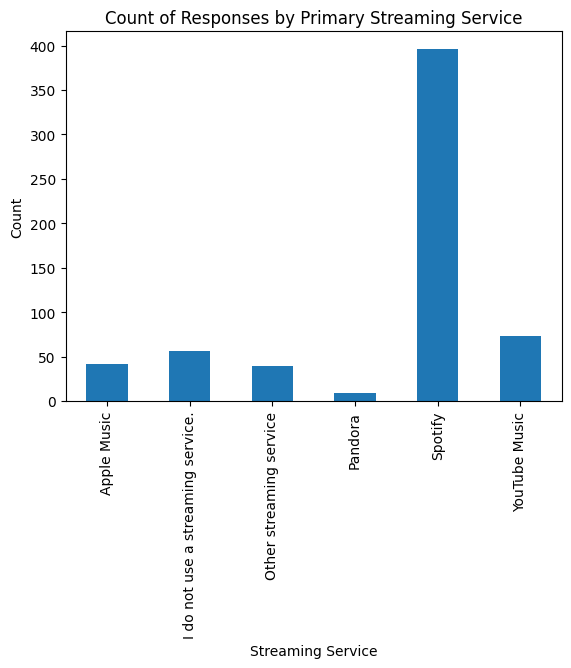

In [ ]:
# you can just run this code as an example
# Bar graph of responses by primary streaming service

# just add plot.bar() to our counted variable
count_by_streaming.plot.bar()

# Set the x and y labels and title
plt.xlabel('Streaming Service')
plt.ylabel('Count')
plt.title('Count of Responses by Primary Streaming Service')

# use plot.show() to display the chart
plt.show()

Follow the steps above to create a bar graph of the average Total Mental Health column score by streaming service.

In [ ]:
# start by averaging the Total Mental Health column by for the streaming_grouped variable and store it in a new variable
avg_mental_health = streaming_grouped['Total Mental Health'].mean()
avg_mental_health

Primary streaming service
Apple Music                          18.821429
I do not use a streaming service.    16.517857
Other streaming service              16.150000
Pandora                              11.333333
Spotify                              17.776515
YouTube Music                        15.287671
Name: Total Mental Health, dtype: float64

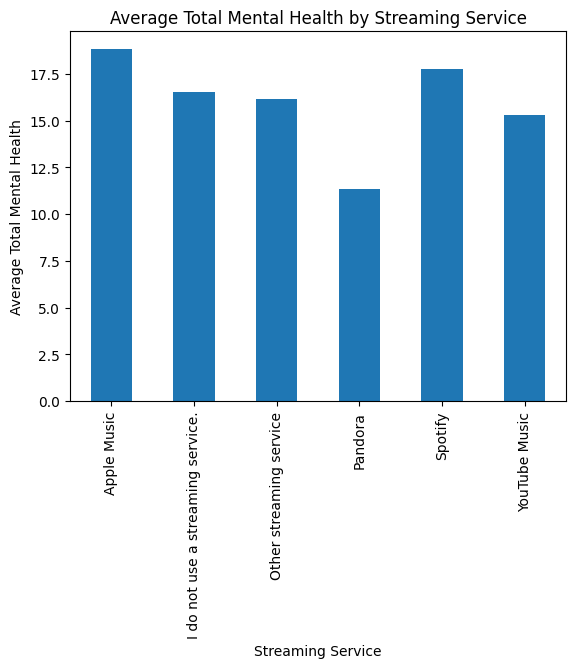

In [ ]:
# then create a plot like the one above with appropriate labels and a title
avg_mental_health.plot.bar()

# Set the x and y labels and title
plt.xlabel('Streaming Service')
plt.ylabel('Average Total Mental Health')
plt.title('Average Total Mental Health by Streaming Service')

# use plot.show() to display the chart
plt.show()

Let's also analyze the percent of responders who listen to music while working. Start by grouping by the While working column, then count by group.

In [ ]:
# group the dataframe by the While working column
df_grouped_working = df.groupby('While working')

# count the responses by group and store in a new variable
count_working = df_grouped_working['Timestamp'].count()

# call your variable to make sure it is working correctly
count_working

While working
No     126
Yes    490
Name: Timestamp, dtype: int64

Let's create a pie chart with our results! Add plot.pie() to your object, then call plt.show(). What do you get?

Inside the pie() parentheses, try adding: autopct='%1.1f%%' and rerun. What is the difference?

Add a title to your graph before plt.show()

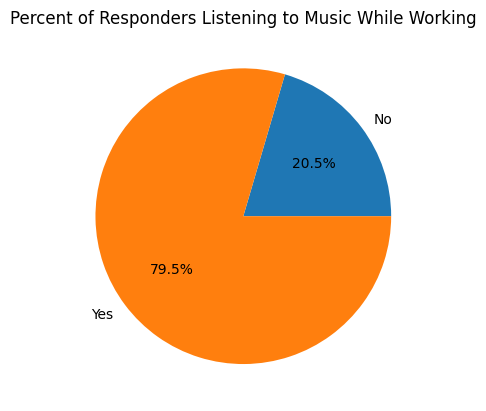

In [ ]:
# add plot.pie() to your counted variable name
count_working.plot.pie(autopct='%1.1f%%')

# Set the title
plt.title('Percent of Responders Listening to Music While Working')
plt.ylabel('')

# call plt.show() to display
plt.show()

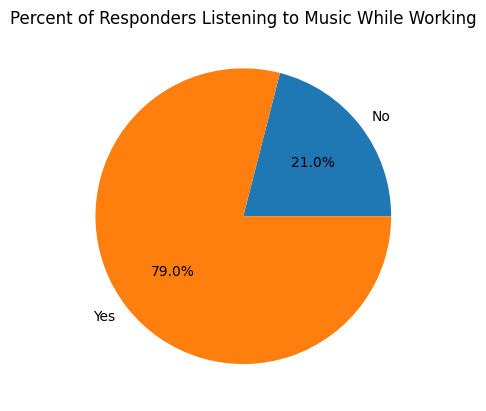

In [ ]:
# Although we called plot.pie() on our counted object, we can also pass the counts to plt.pie instead. Here is an example!
# we get the labels from the counted object using .keys()
plt.pie(count_working, labels = count_working.keys(), autopct='%1.1f%%')
plt.title('Percent of Responders Listening to Music While Working')
plt.show()

Awesome work! Although we won't formally go through matplotlib, feel free to experiment with it in your projects if you'd like to create some visualizations! You have access to the [Treehouse Matplotlib module](https://teamtreehouse.com/library/introduction-to-data-visualization-with-matplotlib) if you'd like to learn on your own.